# Въведение в теорията на вероятностите и статистиката
В този тефтер ще разгледаме някои от концепциите, които обсъдихме по-рано. Много от концепциите в теорията на вероятностите и статистиката са добре представени в основни библиотеки за обработка на данни в Python, като `numpy` и `pandas`.


In [117]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

## Случайни променливи и разпределения
Нека започнем с изтегляне на извадка от 30 стойности от равномерно разпределение в интервала от 0 до 9. Ще изчислим също средната стойност и дисперсията.


In [118]:
sample = [ random.randint(0,10) for _ in range(30) ]
print(f"Sample: {sample}")
print(f"Mean = {np.mean(sample)}")
print(f"Variance = {np.var(sample)}")

Sample: [0, 8, 1, 0, 7, 4, 3, 3, 6, 7, 1, 0, 6, 3, 1, 5, 9, 2, 4, 2, 5, 6, 8, 7, 1, 9, 8, 2, 3, 7]
Mean = 4.266666666666667
Variance = 8.195555555555556


За да направим визуална оценка на това колко различни стойности има в извадката, можем да начертаем **хистограма**:


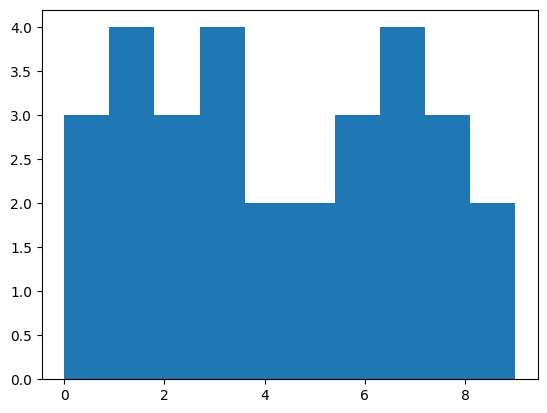

In [119]:
plt.hist(sample)
plt.show()

## Анализ на реални данни

Средната стойност и дисперсията са много важни при анализа на данни от реалния свят. Нека заредим данните за бейзболни играчи от [SOCR MLB Height/Weight Data](http://wiki.stat.ucla.edu/socr/index.php/SOCR_Data_MLB_HeightsWeights)


In [120]:
df = pd.read_csv("../../data/SOCR_MLB.tsv",sep='\t', header=None, names=['Name','Team','Role','Weight','Height','Age'])
df


Empty DataFrame
Columns: [Name, Team, Role, Weight, Height, Age]
Index: []


Използваме пакет, наречен [**Pandas**](https://pandas.pydata.org/) тук за анализ на данни. Ще говорим повече за Pandas и работата с данни в Python по-късно в този курс.

Нека изчислим средните стойности за възраст, височина и тегло:


In [121]:
df[['Age','Height','Weight']].mean()

Age        28.736712
Height    201.726306
Weight     73.697292
dtype: float64

Сега нека се фокусираме върху височината и изчислим стандартното отклонение и дисперсията:


In [122]:
print(list(df['Height'])[:20])

[180, 215, 210, 210, 188, 176, 209, 200, 231, 180, 188, 180, 185, 160, 180, 185, 197, 189, 185, 219]


In [123]:
mean = df['Height'].mean()
var = df['Height'].var()
std = df['Height'].std()
print(f"Mean = {mean}\nVariance = {var}\nStandard Deviation = {std}")

Mean = 201.72630560928434
Variance = 441.6355706557866
Standard Deviation = 21.01512718628623


В допълнение към средната стойност, има смисъл да се разгледат медианата и квартилите. Те могат да бъдат визуализирани с помощта на **кутия с мустаци**:


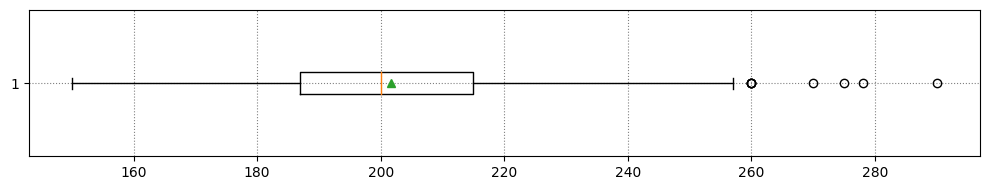

In [124]:
plt.figure(figsize=(10,2))
plt.boxplot(df['Height'], vert=False, showmeans=True)
plt.grid(color='gray', linestyle='dotted')
plt.tight_layout()
plt.show()

Можем също да направим кутии на подмножества от нашия набор от данни, например, групирани по роля на играча.


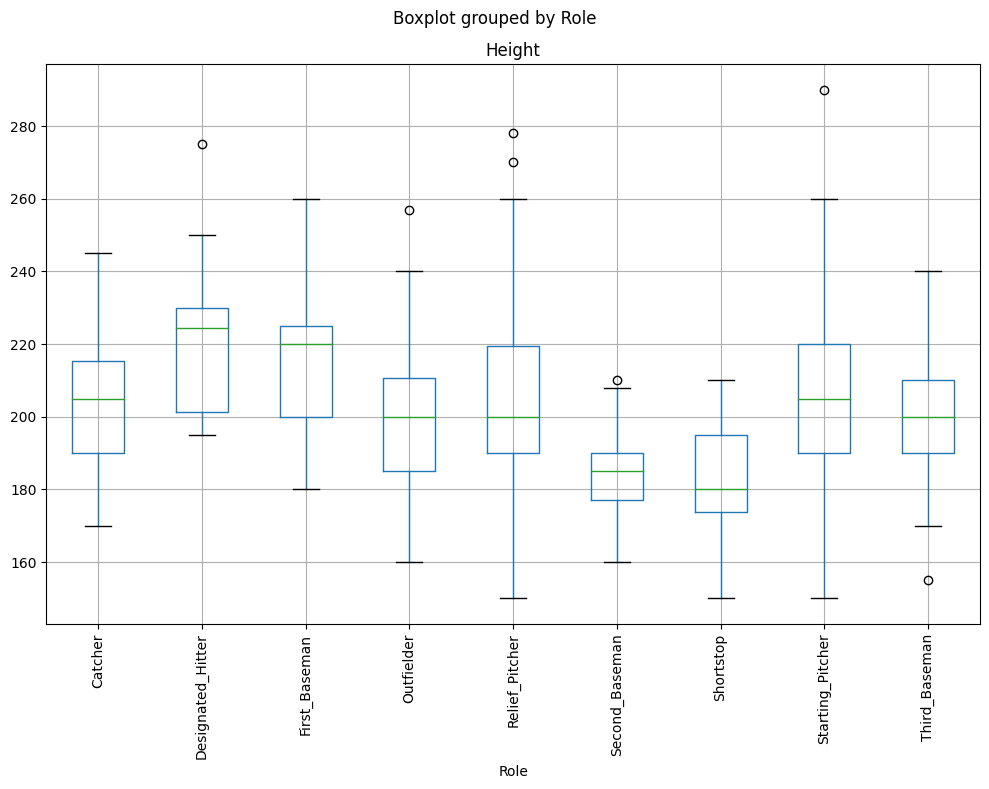

In [125]:
df.boxplot(column='Height', by='Role', figsize=(10,8))
plt.xticks(rotation='vertical')
plt.tight_layout()
plt.show()

> **Забележка**: Тази диаграма предполага, че средно височината на първите базови играчи е по-голяма от височината на вторите базови играчи. По-късно ще научим как можем да тестваме тази хипотеза по-формално и как да демонстрираме, че нашите данни са статистически значими, за да покажем това.

Възрастта, височината и теглото са непрекъснати случайни променливи. Как мислите, че изглежда тяхното разпределение? Един добър начин да разберете е да начертаете хистограма на стойностите:


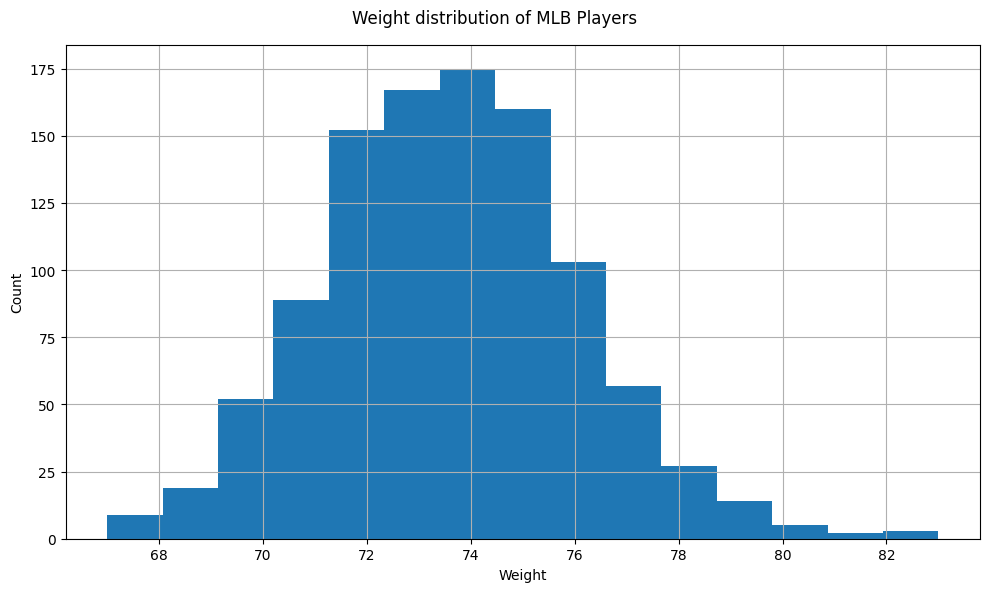

In [126]:
df['Weight'].hist(bins=15, figsize=(10,6))
plt.suptitle('Weight distribution of MLB Players')
plt.xlabel('Weight')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

## Нормално разпределение

Нека създадем изкуствена извадка от тегла, която следва нормално разпределение със същата средна стойност и дисперсия като нашите реални данни:


In [127]:
generated = np.random.normal(mean, std, 1000)
generated[:20]

array([183.05261872, 193.52828463, 154.73707302, 204.27140391,
       203.88907247, 213.74665656, 225.10092364, 171.75867917,
       204.3521425 , 207.52870255, 158.53001756, 240.94399197,
       189.9909742 , 180.72442994, 173.4393402 , 175.98883711,
       197.86092769, 188.61598821, 234.19796698, 209.0295457 ])

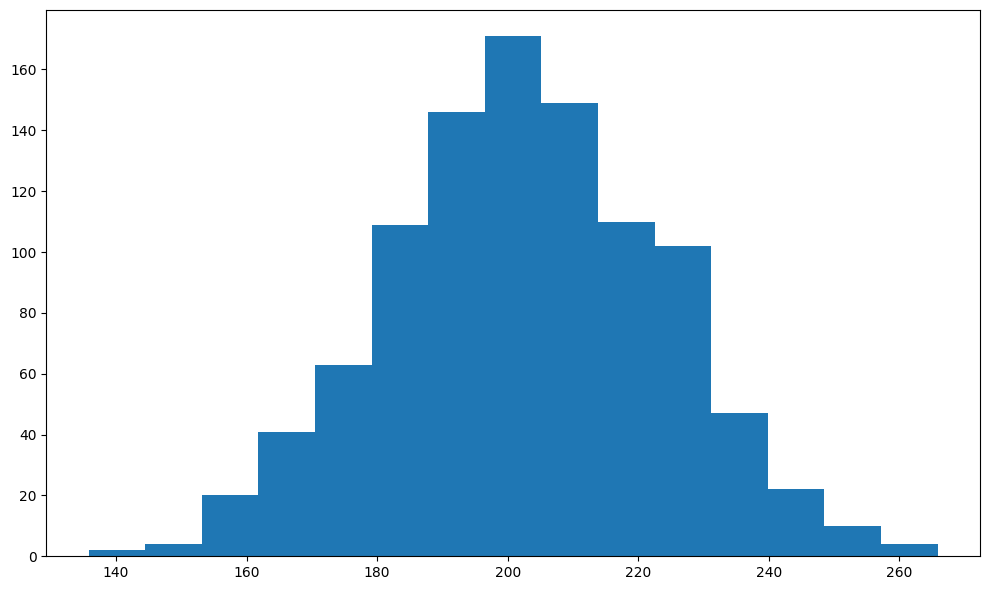

In [128]:
plt.figure(figsize=(10,6))
plt.hist(generated, bins=15)
plt.tight_layout()
plt.show()

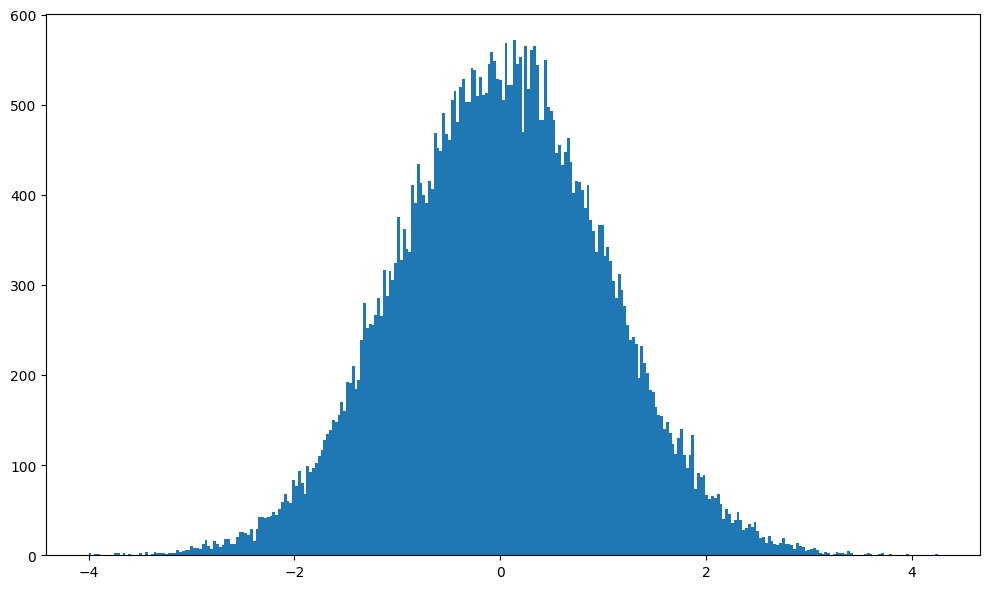

In [129]:
plt.figure(figsize=(10,6))
plt.hist(np.random.normal(0,1,50000), bins=300)
plt.tight_layout()
plt.show()

Тъй като повечето стойности в реалния живот са нормално разпределени, не трябва да използваме генератор на случайни числа с равномерно разпределение, за да генерираме примерни данни. Ето какво се случва, ако се опитаме да генерираме тегла с равномерно разпределение (генерирано чрез `np.random.rand`):


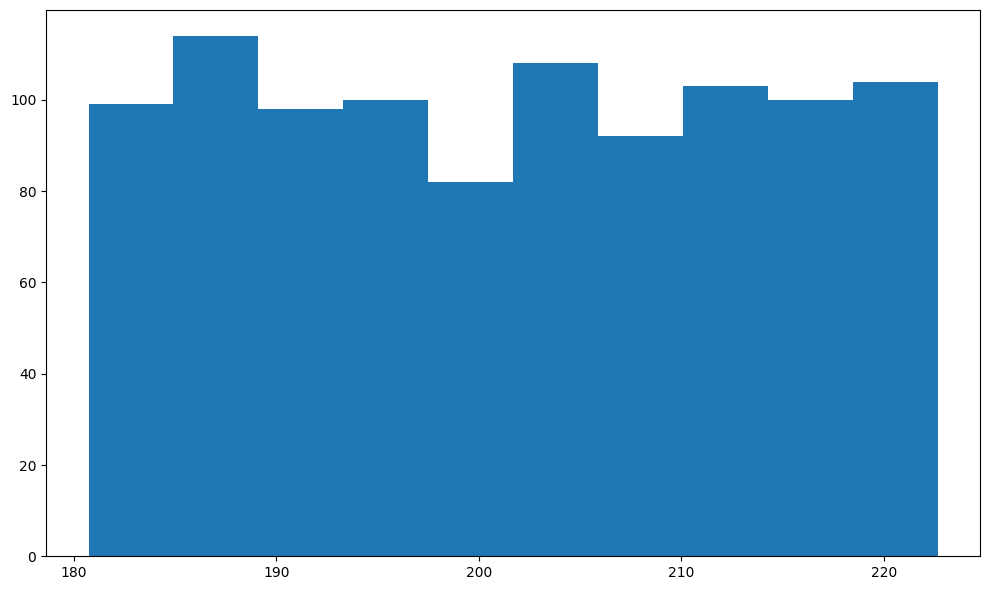

In [130]:
wrong_sample = np.random.rand(1000)*2*std+mean-std
plt.figure(figsize=(10,6))
plt.hist(wrong_sample)
plt.tight_layout()
plt.show()

## Интервали на доверие

Сега нека изчислим интервали на доверие за теглото и височината на бейзболни играчи. Ще използваме кода [от тази дискусия в stackoverflow](https://stackoverflow.com/questions/15033511/compute-a-confidence-interval-from-sample-data):


In [131]:
import scipy.stats

def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, h

for p in [0.85, 0.9, 0.95]:
    m, h = mean_confidence_interval(df['Weight'].fillna(method='pad'),p)
    print(f"p={p:.2f}, mean = {m:.2f} ± {h:.2f}")

p=0.85, mean = 73.70 ± 0.10
p=0.90, mean = 73.70 ± 0.12
p=0.95, mean = 73.70 ± 0.14


## Проверка на хипотези

Нека разгледаме различните роли в нашия набор от данни за бейзболни играчи:


In [132]:
df.groupby('Role').agg({ 'Weight' : 'mean', 'Height' : 'mean', 'Age' : 'count'}).rename(columns={ 'Age' : 'Count'})

Weight      Height  Count
Role                                           
Catcher            72.723684  204.328947     76
Designated_Hitter  74.222222  220.888889     18
First_Baseman      74.000000  213.109091     55
Outfielder         73.010309  199.113402    194
Relief_Pitcher     74.374603  203.517460    315
Second_Baseman     71.362069  184.344828     58
Shortstop          71.903846  182.923077     52
Starting_Pitcher   74.719457  205.321267    221
Third_Baseman      73.044444  200.955556     45

In [133]:
for p in [0.85,0.9,0.95]:
    m1, h1 = mean_confidence_interval(df.loc[df['Role']=='First_Baseman',['Height']],p)
    m2, h2 = mean_confidence_interval(df.loc[df['Role']=='Second_Baseman',['Height']],p)
    print(f'Conf={p:.2f}, 1st basemen height: {m1-h1[0]:.2f}..{m1+h1[0]:.2f}, 2nd basemen height: {m2-h2[0]:.2f}..{m2+h2[0]:.2f}')

Conf=0.85, 1st basemen height: 209.36..216.86, 2nd basemen height: 182.24..186.45
Conf=0.90, 1st basemen height: 208.82..217.40, 2nd basemen height: 181.93..186.76
Conf=0.95, 1st basemen height: 207.97..218.25, 2nd basemen height: 181.45..187.24


Можем да видим, че интервалите не се припокриват.

Статистически по-правилен начин за доказване на хипотезата е използването на **t-тест на Стюдент**:


In [134]:
from scipy.stats import ttest_ind

tval, pval = ttest_ind(df.loc[df['Role']=='First_Baseman',['Height']], df.loc[df['Role']=='Second_Baseman',['Height']],equal_var=False)
print(f"T-value = {tval[0]:.2f}\nP-value: {pval[0]}")

T-value = 9.77
P-value: 1.4185554184322326e-15


Двете стойности, върнати от функцията `ttest_ind`, са:
* p-стойността може да се разглежда като вероятността две разпределения да имат еднаква средна стойност. В нашия случай тя е много ниска, което означава, че има силни доказателства в подкрепа на твърдението, че първите базови играчи са по-високи.
* t-стойността е междинната стойност на нормализираната разлика в средните стойности, която се използва в t-теста и се сравнява с праговата стойност за дадено ниво на увереност.


## Симулиране на нормално разпределение с теоремата за централната граница

Псевдослучайният генератор в Python е създаден да ни предоставя равномерно разпределение. Ако искаме да създадем генератор за нормално разпределение, можем да използваме теоремата за централната граница. За да получим стойност с нормално разпределение, просто ще изчислим средната стойност на извадка, генерирана с равномерно разпределение.


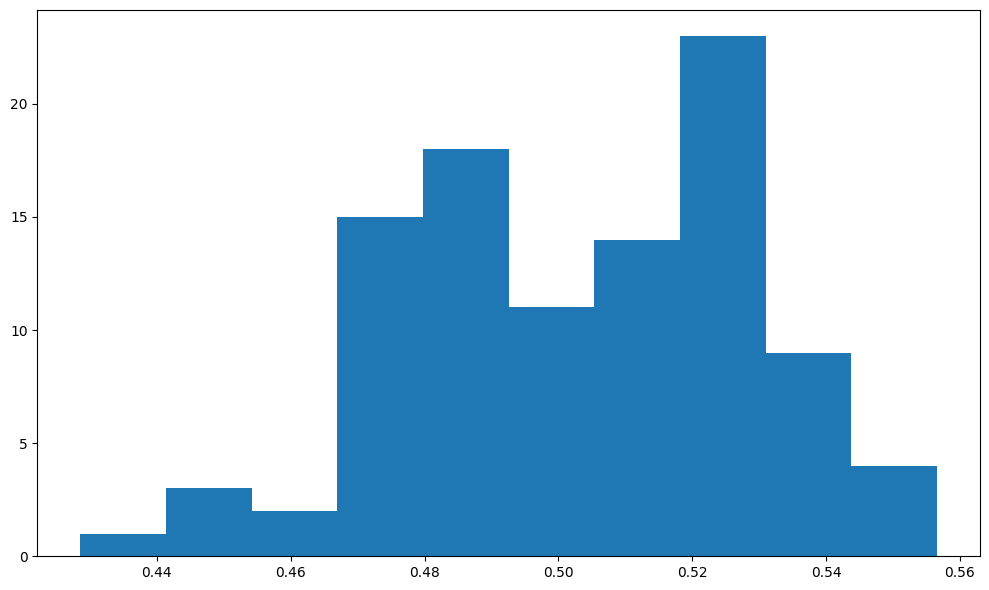

In [135]:
def normal_random(sample_size=100):
    sample = [random.uniform(0,1) for _ in range(sample_size) ]
    return sum(sample)/sample_size

sample = [normal_random() for _ in range(100)]
plt.figure(figsize=(10,6))
plt.hist(sample)
plt.tight_layout()
plt.show()

## Корелация и Злата бейзболна корпорация

Корелацията ни позволява да откриваме връзки между последователности от данни. В нашия пример, нека си представим, че съществува зла бейзболна корпорация, която плаща на своите играчи според тяхната височина - колкото по-висок е играчът, толкова повече пари получава. Да предположим, че има базова заплата от $1000 и допълнителен бонус от $0 до $100, в зависимост от височината. Ще вземем реални играчи от MLB и ще изчислим техните въображаеми заплати:


In [136]:
heights = df['Height']
salaries = 1000+(heights-heights.min())/(heights.max()-heights.mean())*100
print(list(zip(heights, salaries))[:10])

[(180, 1033.985209531635), (215, 1073.6346206518763), (210, 1067.9704190632704), (210, 1067.9704190632704), (188, 1043.0479320734046), (176, 1029.4538482607504), (209, 1066.837578745549), (200, 1056.6420158860585), (231, 1091.760065735415), (180, 1033.985209531635)]


Нека сега изчислим ковариацията и корелацията на тези последователности. `np.cov` ще ни даде така наречената **ковариационна матрица**, която е разширение на ковариацията за множество променливи. Елементът $M_{ij}$ на ковариационната матрица $M$ е корелация между входните променливи $X_i$ и $X_j$, а диагоналните стойности $M_{ii}$ са дисперсията на $X_{i}$. По подобен начин, `np.corrcoef` ще ни даде **корелационната матрица**.


In [137]:
print(f"Covariance matrix:\n{np.cov(heights, salaries)}")
print(f"Covariance = {np.cov(heights, salaries)[0,1]}")
print(f"Correlation = {np.corrcoef(heights, salaries)[0,1]}")

Covariance matrix:
[[441.63557066 500.30258018]
 [500.30258018 566.76293389]]
Covariance = 500.3025801786725
Correlation = 0.9999999999999997


Корелация, равна на 1, означава, че има силна **линейна връзка** между две променливи. Можем визуално да видим линейната връзка, като начертаем едната стойност спрямо другата:


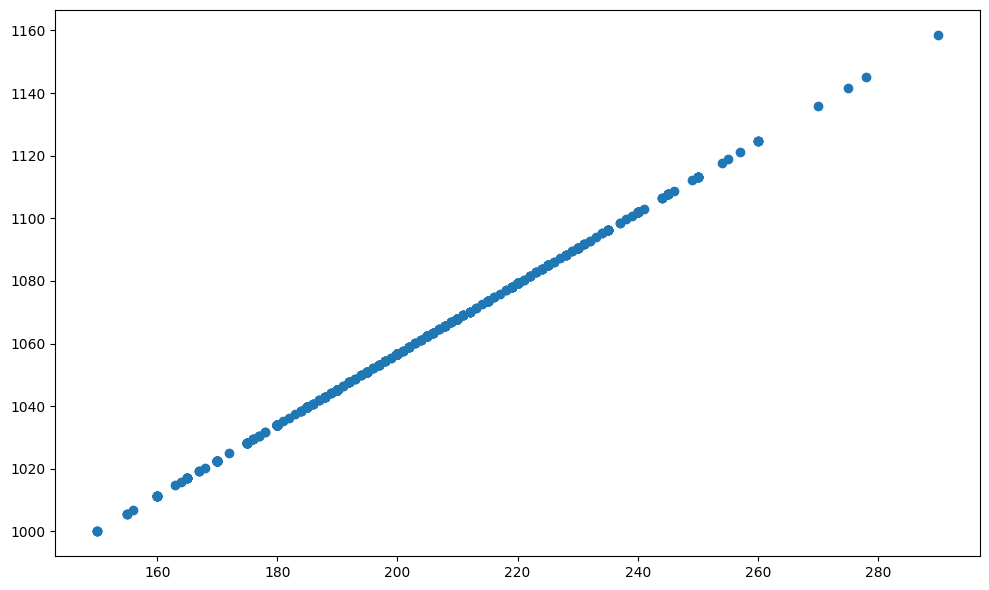

In [138]:
plt.figure(figsize=(10,6))
plt.scatter(heights,salaries)
plt.tight_layout()
plt.show()

Нека видим какво се случва, ако зависимостта не е линейна. Да предположим, че нашата корпорация реши да скрие очевидната линейна зависимост между височините и заплатите и въведе някаква нелинейност във формулата, като например `sin`:


In [139]:
salaries = 1000+np.sin((heights-heights.min())/(heights.max()-heights.mean()))*100
print(f"Correlation = {np.corrcoef(heights, salaries)[0,1]}")

Correlation = 0.9910655775558532


В този случай корелацията е малко по-малка, но все още е доста висока. Сега, за да направим връзката още по-малко очевидна, може да добавим допълнителна случайност, като добавим някаква случайна променлива към заплатата. Нека видим какво ще се случи:


In [140]:
salaries = 1000+np.sin((heights-heights.min())/(heights.max()-heights.mean()))*100+np.random.random(size=len(heights))*20-10
print(f"Correlation = {np.corrcoef(heights, salaries)[0,1]}")

Correlation = 0.948230287835537


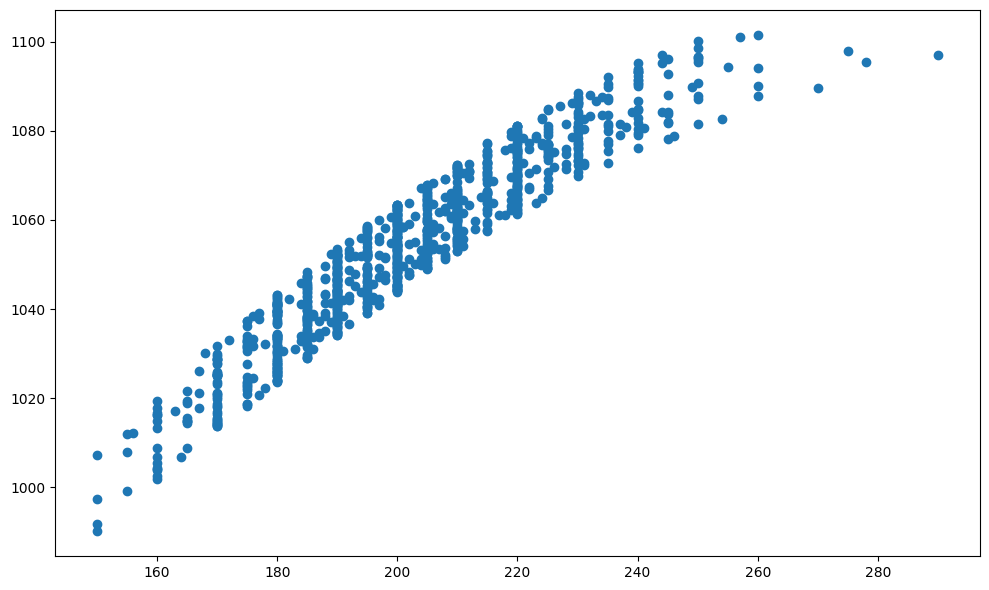

In [141]:
plt.figure(figsize=(10,6))
plt.scatter(heights, salaries)
plt.tight_layout()
plt.show()

> Можете ли да предположите защо точките се подреждат във вертикални линии по този начин?

Наблюдавахме връзката между изкуствено създадена концепция като заплата и наблюдаваната променлива *височина*. Нека също така видим дали двете наблюдавани променливи, като височина и тегло, също корелират:


In [142]:
np.corrcoef(df['Height'],df['Weight'])

array([[1.        , 0.52959196],
       [0.52959196, 1.        ]])

За съжаление, не получихме никакви резултати - само някакви странни стойности `nan`. Това се дължи на факта, че някои от стойностите в нашата серия са неопределени, представени като `nan`, което води до неопределен резултат от операцията. Като разгледаме матрицата, можем да видим, че колоната `Weight` е проблемната, защото само-корелацията между стойностите на `Height` е била изчислена.

> Този пример показва колко е важно **подготвянето на данни** и **почистването им**. Без подходящи данни не можем да изчислим нищо.

Нека използваме метода `fillna`, за да запълним липсващите стойности, и да изчислим корелацията:


In [143]:
np.corrcoef(df['Height'],df['Weight'].fillna(method='pad'))

array([[1.        , 0.52959196],
       [0.52959196, 1.        ]])

Наистина има корелация, но не толкова силна, колкото в нашия изкуствен пример. Наистина, ако погледнем разсейващата диаграма на една стойност спрямо другата, връзката би била много по-малко очевидна:


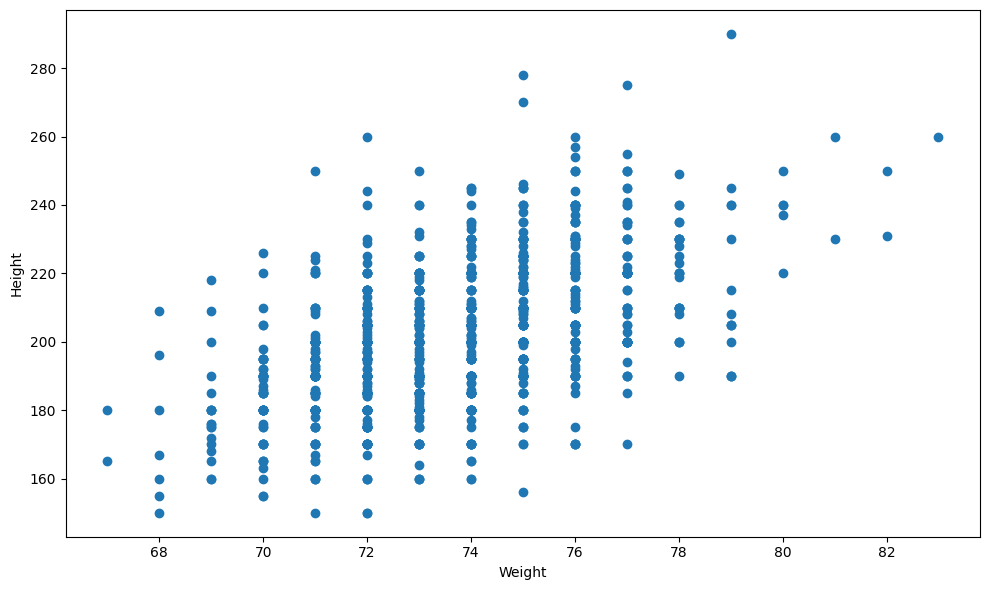

In [144]:
plt.figure(figsize=(10,6))
plt.scatter(df['Weight'],df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')
plt.tight_layout()
plt.show()

## Заключение

В този тефтер научихме как да извършваме основни операции с данни за изчисляване на статистически функции. Сега знаем как да използваме стабилен апарат от математика и статистика, за да доказваме хипотези, както и как да изчисляваме доверителни интервали за произволни променливи, базирани на дадена извадка от данни.



---

**Отказ от отговорност**:  
Този документ е преведен с помощта на AI услуга за превод [Co-op Translator](https://github.com/Azure/co-op-translator). Въпреки че се стремим към точност, моля, имайте предвид, че автоматичните преводи може да съдържат грешки или неточности. Оригиналният документ на неговия изходен език трябва да се счита за авторитетен източник. За критична информация се препоръчва професионален превод от човек. Ние не носим отговорност за каквито и да е недоразумения или погрешни интерпретации, произтичащи от използването на този превод.
